<a href="https://colab.research.google.com/github/leandroleao2k/PyLeao/blob/main/PreProc_TextAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import warnings 
warnings.filterwarnings('ignore')
# instalando tokenizadores
#!pip install spacy pyLDAvis
#!python -m spacy download pt_core_news_sm
import spacy
# download dos tokenizadores
import nltk
import re
from nltk import word_tokenize
from nltk.util import ngrams
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True


Dados
```
# Isto está formatado como código
```



In [3]:
%timeit news = pd.read_csv('/content/drive/MyDrive/PucData/articles.zip')
turismo = news[news['category'] == 'turismo']
news.head()

1 loop, best of 5: 9.79 s per loop


,title,text,date,category,subcategory,link
0,"Lula diz que está 'lascado', mas que ainda tem...",Com a possibilidade de uma condenação impedir ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
1,"'Decidi ser escrava das mulheres que sofrem', ...","Para Oumou Sangaré, cantora e ativista malines...",2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
2,Três reportagens da Folha ganham Prêmio Petrob...,Três reportagens da Folha foram vencedoras do ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
3,Filme 'Star Wars: Os Últimos Jedi' ganha trail...,A Disney divulgou na noite desta segunda-feira...,2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
4,CBSS inicia acordos com fintechs e quer 30% do...,"O CBSS, banco da holding Elopar dos sócios Bra...",2017-09-10,mercado,NaN,http://www1.folha.uol.com.br/mercado/2017/10/1...


Limpando o texto

In [4]:
from spacy.lang.pt import Portuguese
# palavras comuns q nao precisam ser utilizadas
STOP_WORDS = spacy.lang.pt.stop_words.STOP_WORDS

from spacy.lang.pt.stop_words import STOP_WORDS
def limpa_texto(texto):
    # remover final de linha
    c = re.sub(r'\n',' ',texto)
    c = re.sub(r'\r',' ',c)

    c = c.replace(':', '')
    c = c.replace('/', '')
    c = re.sub(r'R\$', '', c)
    c = re.sub(r'\W', ' ', c) # caracteres nao alfanumericos
    c = re.sub(r'\s+', ' ', c) # caracteres multiplos espaços
    c = re.sub(r'^\s+$', ' ', c) # caracteres espaços adicionais
    return c.lower()

# retorna " " a STOP_WORD
def remover_stop_word(texto):
  doc = nlp_pt(texto)
  return " ".join(x.text for x in doc if x.text not in STOP_WORDS)

# retorna texto ao seu lemma
def limpa_texto_lemma(texto):
  doc = nlp_pt(texto)
  return " ".join(x.lemma_ for x in doc if x.text not in STOP_WORDS)



Analise Exploratoria

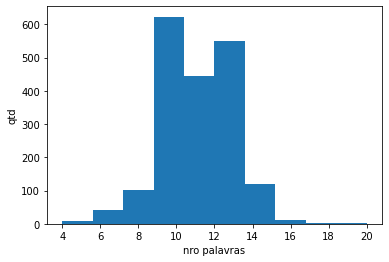

,title_n_words
count,1903.000000
mean,10.923805
std,1.812440
min,4.000000
25%,10.000000
50%,11.000000
75%,12.000000
max,20.000000


In [5]:
# da um split no texto
turismo['title_n_words'] = turismo['title'].apply(lambda x : len(x.split()))
turismo.title_n_words.hist()
plt.xlabel('nro palavras')
plt.ylabel('qtd')
plt.grid(b=None)
plt.show()

turismo.head()
turismo.describe()

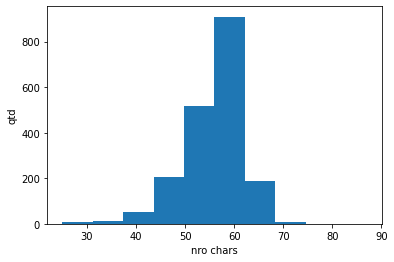

In [6]:
# nro de caracteres
turismo['title_n_chars'] = turismo['title'].apply(lambda x : len(x.replace(' ', '')))
turismo['title_n_chars']
turismo.title_n_chars.hist()
plt.xlabel('nro chars')
plt.ylabel('qtd')
plt.grid(b=None)
plt.show()

Limpeza dos Dados


In [7]:
# instalando tokenizadores
#!pip install spacy pyLDAvis
#!conda create -n $envC
#!conda activate $envC
#!conda install spacy
#!python -m spacy download pt_core_news_sm

# download dos tokenizadores
nltk.download('punkt')
nlp_pt = spacy.load('pt_core_news_sm')

rev = turismo.iloc[0]['title']
print(rev)
rev = limpa_texto(rev)
print(rev)
# linhe 6
rev = turismo.iloc[6]['title']
print(rev)
rev = limpa_texto(rev)
print(rev)
nev = nlp_pt(rev)
print(rev)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Latam inaugura voo direto de 15 horas entre Chile e Austrália
latam inaugura voo direto de 15 horas entre chile e austrália
Veja como aproveitar bem uma escala longa
veja como aproveitar bem uma escala longa
veja como aproveitar bem uma escala longa


# Lematizacao


In [8]:
turismo.columns
turismo['title_clean'] = turismo['title'].apply(lambda x : limpa_texto(x)) 
turismo['title_clean_no_stop'] = turismo['title_clean'].apply(lambda x : remover_stop_word(x)) 
turismo['title_lemmas'] = turismo['title_clean_no_stop'].apply(lambda x : limpa_texto_lemma(x) )
# turismo.iloc[0]['title_lemmas']



In [9]:
turismo['title_lemmas']

381       latir inaugurar voar direto 15 horar chile e a...
414                      turismo o vegas recuperar analista
522       brasileiro criar app economizar passear gôndol...
602                    airbnb passar o reservar restaurante
609            museu lembrar década opressão soviético país
                                ...                        
166982    fotógrafo gustavo epifanio o cidade cordilheir...
167005    conhecer ritual tradicional passagem ano o o r...
167007            metrô londres ficar baratar turista n ano
167011    rede estrangeiro hotel econômicos ampliar pres...
167031       turismo estrear instagram dica viagem destaque
Name: title_lemmas, Length: 1903, dtype: object